In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




In [2]:
av = pd.read_csv('avocado.csv', index_col=0)

In [3]:
av.head()
# we need to find average price per day per region, since we have the same day for several cities in the same state
# how do we do that???? does it affect stationarity, how do we deal with it?

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
av.rename(columns={'4046':'small', '4225':'medium', '4770':'large'}, inplace=True)

In [5]:
av.drop(columns=['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], inplace=True)

In [6]:
av.shape

(18249, 9)

# creating date time object in date column

In [7]:
av['Date'] = pd.to_datetime(av['Date'], format='%Y-%m-%d')

In [8]:
av.head()

,Date,AveragePrice,Total Volume,small,medium,large,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


In [9]:
av.set_index('Date')

,AveragePrice,Total Volume,small,medium,large,type,year,region
Date,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico


# simple EDA

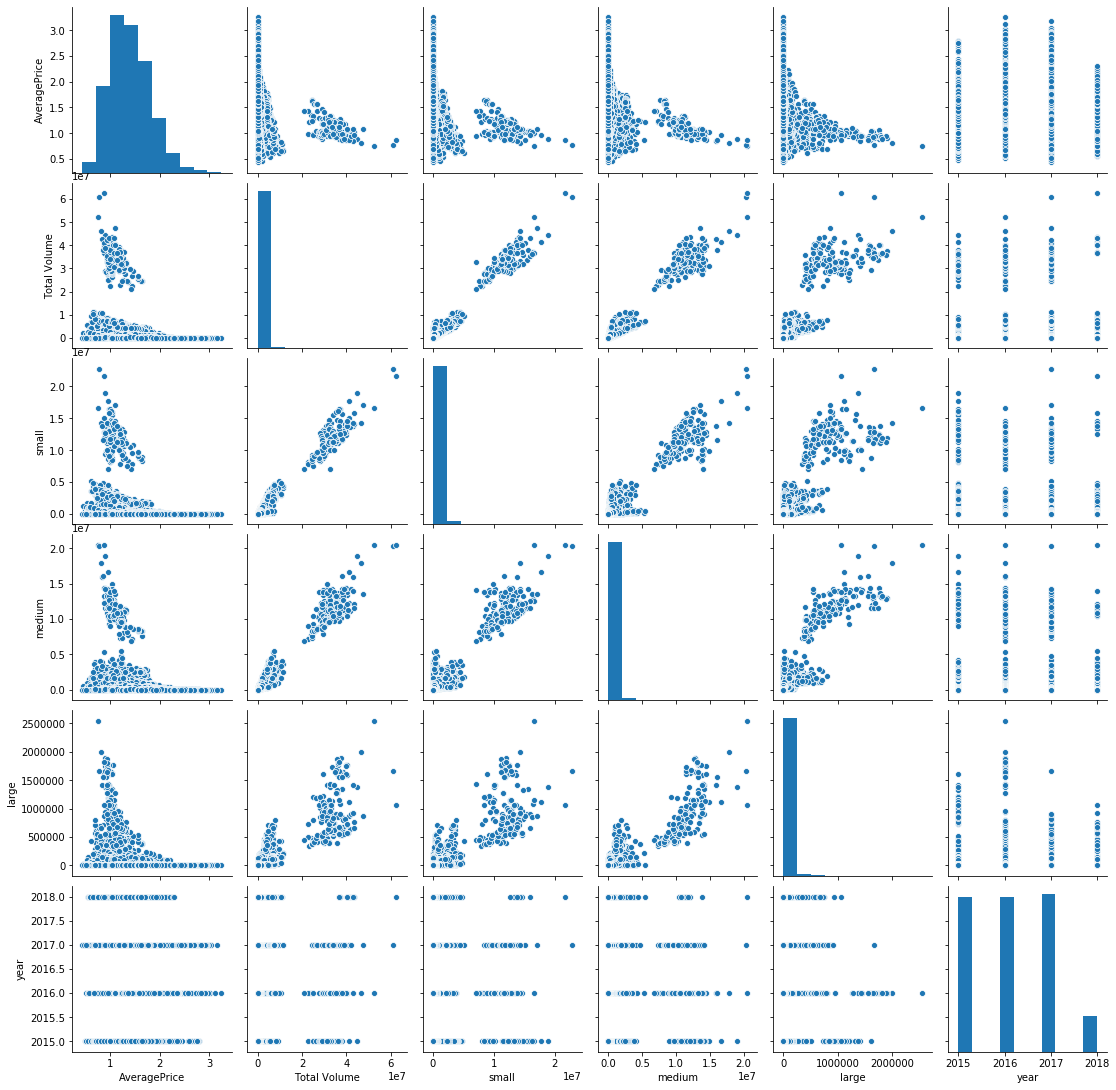

In [12]:
# sns.pairplot(av)

KeyboardInterrupt: 

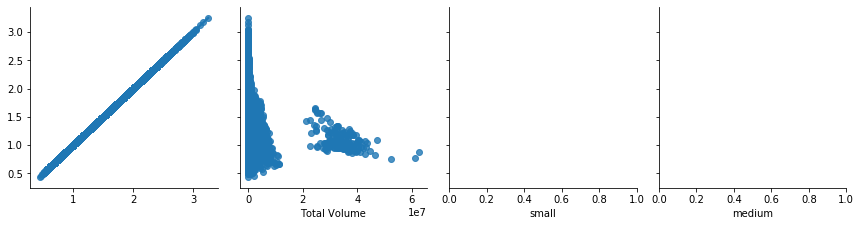

In [11]:
# # Function to plot each feature vs target variable
# def plot_features(df, features):
#     pp_rows = [features[i:i+4] for i in range(0, len(features), 4)]
#     for row in pp_rows:
#         pp = sns.pairplot(data=df, x_vars=row, y_vars='AveragePrice', kind='reg', height=3)
#     return plt.show()

# features = av.drop(['type', 'year', 'region', 'Date'], axis=1).keys()
# plot_features(av, features)

In [ ]:
av.isnull().sum()

In [ ]:
av.groupby('region')['AveragePrice'].plot()

# removing regions and combining multiple cities into a single state

In [13]:
av['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [14]:
 stat = {'Albany':'ny', 'Atlanta':'ga', 'BaltimoreWashington':'md', 'Boise':'id','Boston':'ma',
         'BuffaloRochester':'ny', 'California':'ca', 'Charlotte':'nc', 'Chicago':'il', 'Detroit':'mi',
         'GrandRapids':'mi', 'GreatLakes':'greatlakes', 'HarrisburgScranton':'pa', 'HartfordSpringfield': 'ct',
         'Houston':'tx', 'Indianapolis':'in', 'Jacksonville':'fl', 'LasVegas':'nv', 'LosAngeles':'ca',
         'Louisville':'ky', 'MiamiFtLauderdale':'fl', 'Midsouth':'midsouth', 'Nashville':'tn',
         'NewOrleansMobile':'la', 'NewYork':'ny', 'Northeast':'northeast',
         'NorthernNewEngland':'northernnewengland', 'Orlando':'fl', 'Philadelphia':'pa', 'PhoenixTucson':'az',
         'Pittsburgh':'pa', 'Plains':'plains', 'Portland':'or', 'RaleighGreensboro':'nc', 
         'RichmondNorfolk':'va', 'Roanoke':'va', 'Sacramento':'ca', 'SanDiego':'ca', 'SanFrancisco':'ca',
         'Seattle':'wa', 'SouthCarolina':'sc', 'SouthCentral':'southcentral', 'Southeast':'southeast',
         'Spokane':'wa', 'StLouis':'mo', 'Syracuse':'ny', 'Tampa':'fl', 'TotalUS':'USA', 'West':'west', 
         'WestTexNewMexico':'nm', 'CincinnatiDayton':'oh', 'Columbus':'oh', 'DallasFtWorth':'tx', 'Denver':'co'}

# northeast, midsouth, southeast, south central, west, great lakes, northern new england, totalUS


'''aggregate the west ourselves and see if the pre-made aggregated west region correctly represents the data'''

'aggregate the west ourselves and see if the pre-made aggregated west region correctly represents the data'

In [15]:
cities = list(set(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico']) - set(['Northeast', 'Midsouth', 'Southeast', 'SouthCentral', 'West', 'GreatLakes', 'TotalUS', 'NorthernNewEngland', 'Plains']))


In [16]:
cities

['RaleighGreensboro',
 'SouthCarolina',
 'Roanoke',
 'Atlanta',
 'MiamiFtLauderdale',
 'Charlotte',
 'BaltimoreWashington',
 'Nashville',
 'Orlando',
 'RichmondNorfolk',
 'Jacksonville',
 'LosAngeles',
 'Chicago',
 'Albany',
 'Pittsburgh',
 'Detroit',
 'PhoenixTucson',
 'BuffaloRochester',
 'Houston',
 'Philadelphia',
 'Spokane',
 'WestTexNewMexico',
 'Denver',
 'Sacramento',
 'Syracuse',
 'DallasFtWorth',
 'Seattle',
 'Boston',
 'Boise',
 'Indianapolis',
 'HarrisburgScranton',
 'HartfordSpringfield',
 'LasVegas',
 'CincinnatiDayton',
 'SanDiego',
 'NewYork',
 'SanFrancisco',
 'NewOrleansMobile',
 'Columbus',
 'GrandRapids',
 'Louisville',
 'California',
 'Portland',
 'StLouis',
 'Tampa']

In [17]:
avocado = av[av['region'].isin(cities)].copy()

In [18]:
avocado.shape

(15207, 9)

In [19]:
avocado.replace({'region':stat}, inplace=True)

In [20]:
avocado.groupby('region')['AveragePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
az,338.0,1.224438,0.548283,0.46,0.6800,1.225,1.7200,2.62
ca,1690.0,1.487053,0.495607,0.53,1.1000,1.400,1.8075,3.25
co,338.0,1.218580,0.317915,0.60,0.9900,1.165,1.4300,2.16
ct,338.0,1.818639,0.468989,0.86,1.3900,1.800,2.2700,2.68
fl,1352.0,1.463624,0.376066,0.54,1.2075,1.440,1.7300,3.17
ga,338.0,1.337959,0.398297,0.62,1.0400,1.230,1.6200,2.75
id,338.0,1.348136,0.457911,0.58,1.0300,1.220,1.6375,2.79
il,338.0,1.556775,0.335439,0.70,1.2400,1.610,1.8000,2.30
in,338.0,1.313994,0.282894,0.77,1.0800,1.290,1.5275,2.10


In [21]:
avocado.groupby('region')['Total Volume'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
az,338.0,5.788264e+05,5.974847e+05,4881.79,11449.3575,339075.580,1.138581e+06,2200550.27
ca,1690.0,1.087375e+06,1.867886e+06,3562.52,22347.4175,251731.110,7.659474e+05,11213596.29
co,338.0,4.109542e+05,3.940824e+05,6554.93,27517.2050,329377.845,7.663101e+05,1381528.74
ct,338.0,1.499128e+05,1.474348e+05,1494.63,8060.3800,111484.915,2.811244e+05,522565.33
fl,1352.0,1.857459e+05,2.258621e+05,84.56,3721.9050,53105.295,3.355664e+05,1310671.51
ga,338.0,2.621453e+05,2.631071e+05,3047.38,10989.8975,182673.440,4.907090e+05,957792.07
id,338.0,4.264257e+04,4.247940e+04,562.64,2212.7675,28988.585,8.132399e+04,136377.55
il,338.0,3.955690e+05,3.846002e+05,9910.84,29956.2450,231780.020,7.639302e+05,1802646.35
in,338.0,8.953666e+04,8.911021e+04,964.25,3746.8175,60553.145,1.680288e+05,335442.41


# creating df for different types of avocados

In [22]:
conventional = avocado[avocado['type'] == 'conventional']

In [23]:
organic = avocado[avocado['type'] == 'organic']

In [24]:
organic.head()

,Date,AveragePrice,Total Volume,small,medium,large,type,year,region
0,2015-12-27,1.83,989.55,8.16,88.59,0.0,organic,2015,ny
1,2015-12-20,1.89,1163.03,30.24,172.14,0.0,organic,2015,ny
2,2015-12-13,1.85,995.96,10.44,178.70,0.0,organic,2015,ny
3,2015-12-06,1.84,1158.42,90.29,104.18,0.0,organic,2015,ny
4,2015-11-29,1.94,831.69,0.00,94.73,0.0,organic,2015,ny


In [25]:
conventional.head()

,Date,AveragePrice,Total Volume,small,medium,large,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,ny
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,ny
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,ny
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,ny
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,ny


        AvgPrice
Date 1     1
Date 1     2
Date 1     3
Date 2     .
Date 2     .
Date 2     .
->

Date 1     2
Date 2     .

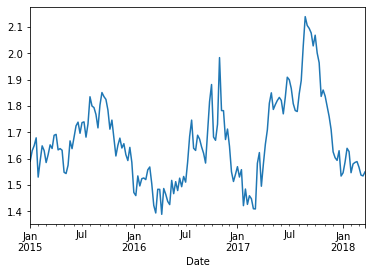

In [33]:
organic.groupby(['Date'])['AveragePrice'].mean().plot()

In [54]:
organic_by_dates = organic.groupby(['Date'])['AveragePrice'].mean()
split = int(len(organic_by_dates)/2)
fhalf,thalf = organic_by_dates[:split],organic_by_dates[split:]
(fhalf.mean(), thalf.mean()), (fhalf.std()**2,thalf.std()**2)

((1.6156812770562772, 1.7120919786096245),
 (0.012582104594083612, 0.03212652994112245))

In [64]:
organic_by_dates = (np.log(organic.groupby(['Date'])['AveragePrice'].mean())).diff(periods = 1)[1:]
split = int(len(organic_by_dates)/2)
fhalf,thalf = organic_by_dates[:split],organic_by_dates[split:]
(fhalf.mean(), thalf.mean()), (fhalf.std()**2,thalf.std()**2)

((0.000716631924354916, -0.0010267395194584604),
 (0.0011597468656518782, 0.0018036451545079381))

In [50]:
import scipy.stats as stats

In [65]:
#h0 equal means, h1: no equal means
stats.ttest_ind(fhalf,thalf)

Ttest_indResult(statistic=0.2935181878825282, pvalue=0.7694927381890805)

region
az    AxesSubplot(0.125,0.125;0.775x0.755)
ca    AxesSubplot(0.125,0.125;0.775x0.755)
co    AxesSubplot(0.125,0.125;0.775x0.755)
ct    AxesSubplot(0.125,0.125;0.775x0.755)
fl    AxesSubplot(0.125,0.125;0.775x0.755)
ga    AxesSubplot(0.125,0.125;0.775x0.755)
id    AxesSubplot(0.125,0.125;0.775x0.755)
il    AxesSubplot(0.125,0.125;0.775x0.755)
in    AxesSubplot(0.125,0.125;0.775x0.755)
ky    AxesSubplot(0.125,0.125;0.775x0.755)
la    AxesSubplot(0.125,0.125;0.775x0.755)
ma    AxesSubplot(0.125,0.125;0.775x0.755)
md    AxesSubplot(0.125,0.125;0.775x0.755)
mi    AxesSubplot(0.125,0.125;0.775x0.755)
mo    AxesSubplot(0.125,0.125;0.775x0.755)
nc    AxesSubplot(0.125,0.125;0.775x0.755)
nm    AxesSubplot(0.125,0.125;0.775x0.755)
nv    AxesSubplot(0.125,0.125;0.775x0.755)
ny    AxesSubplot(0.125,0.125;0.775x0.755)
oh    AxesSubplot(0.125,0.125;0.775x0.755)
or    AxesSubplot(0.125,0.125;0.775x0.755)
pa    AxesSubplot(0.125,0.125;0.775x0.755)
sc    AxesSubplot(0.125,0.125;0.775x0.755)
tn  

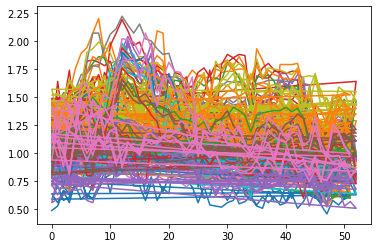

In [27]:
conventional.groupby('region')['AveragePrice'].plot()

In [ ]:
pd.pivot_table(organic, )

# dickey fuller test

In [35]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
grrt = np.log(av['AveragePrice'])

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = []
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

In [ ]:
avocado['AveragePrice'].diff(periods=1)

In [ ]:
difference(av['AveragePrice'])

In [ ]:
test = adfuller((np.log(avocado['AveragePrice']).diff(periods=1))[1:])
# test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

In [45]:
#conventional only
test2 = adfuller(organic.groupby(['Date'])['AveragePrice'].mean())
dfoutput = pd.Series(test2[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -3.266344
p-value                          0.016452
#Lags Used                      11.000000
Number of Observations Used    157.000000
dtype: float64


In [46]:
#conventional only
test2 = adfuller(np.log(organic.groupby(['Date'])['AveragePrice'].mean()))
dfoutput = pd.Series(test2[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                  -3.382259
p-value                          0.011579
#Lags Used                      11.000000
Number of Observations Used    157.000000
dtype: float64


In [68]:
#conventional prices by date
conventional_by_date = conventional.groupby(['Date'])['AveragePrice'].mean()
conventional_final = (np.log(conventional_by_date)).diff(periods = 1)[1:]
#organic prices by date
organic_by_date = organic.groupby(['Date'])['AveragePrice'].mean()
organic_final = (np.log(organic_by_date)).diff(periods = 1)[1:]

# Modeling

In [66]:
#imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

**Conventional Plots**

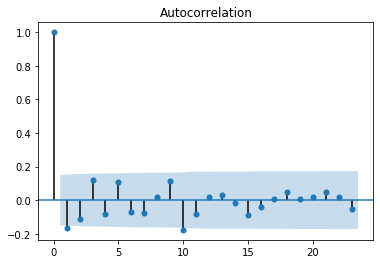

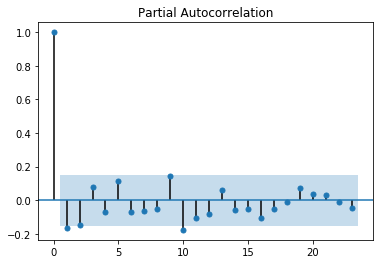

In [82]:
plot_acf(conventional_final)
plot_pacf(conventional_final)
plt.show()

**Organic Plots**

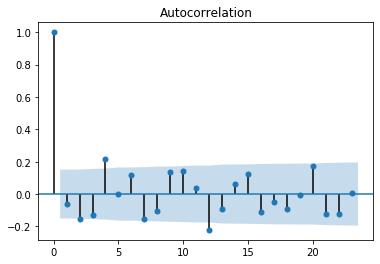

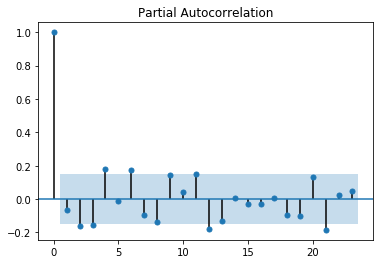

In [83]:
plot_acf(organic_final)
plot_pacf(organic_final)
plt.show()